<a href="https://colab.research.google.com/github/krishn-maloo/ML-092/blob/main/ML_Week_3(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import time

In [ ]:
def linear(X, b0, b1):
    return [b0+b1*x for x in X]

In [ ]:
def intercept(X, Y, b1):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    return y_-b1*x_

In [ ]:
def slope(X, Y):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    rise = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)])
    run = sum([(x-x_)**2 for x,y in zip(X,Y)])

    return rise / run

In [ ]:
data = pd.read_csv("/content/Automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 205 Columns 26


In [ ]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [ ]:
try:
    data[['price']] = data[['price']].astype(int)
except ValueError:
    print("Trying out the line of code above will result to this error:\n")
    print("Value Error: invalid literal for int() with base 10: '?'")

Trying out the line of code above will result to this error:

Value Error: invalid literal for int() with base 10: '?'


In [ ]:
data['price'].value_counts()[:5]

price
?        4
8921     2
18150    2
8845     2
8495     2
Name: count, dtype: int64

In [ ]:
data = data.loc[data['price']!='?']
data[['price']] = data[['price']].astype(int)

<ipython-input-10-0fcbbc2f0aa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = data[['price']].astype(int)


In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
final_data = data[['engine-size', 'price']]
predictor = data['engine-size']
target = data['price']

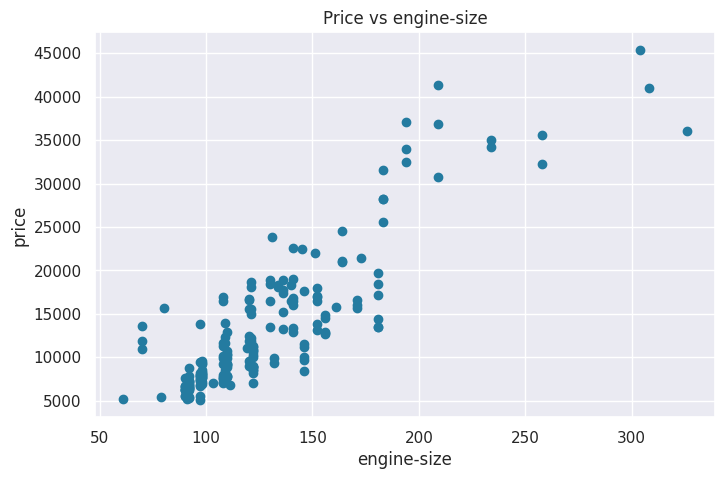

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Price vs engine-size")
plt.scatter(predictor, target, color = "#247ba0")
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

In [ ]:
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25f5c')
plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

In [ ]:
print("Coefficients:\n=============")
print("b0 : ", b0)
print("b1 : ", b1)

Coefficients:
b0 :  -7963.338906281075
b1 :  166.8600156914162


In [ ]:
def r_squared(Y, Y_HAT):
    ssr, sse, r_sqr = [0]*3
    y_ = np.mean(Y)
#     ssr = sum([(y_hat - y_)**2 for y_hat in Y_HAT])
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    sst = sum([(y - y_)**2 for y in Y])

    r_sqr = 1 - (sse / sst)

    return r_sqr

In [ ]:
r_squared(target, predicted)

0.7609686443622008

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
predictor = np.array(predictor).reshape((-1, 1))
reg = reg.fit(predictor, target)

Y_pred = reg.predict(predictor)
r2_score = reg.score(predictor, target)
print(r2_score)

0.7609686443622008
